## Importing Relevant Libraries

In [6]:
import json
import keras
import pandas as pd
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, Activation, Embedding
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import json
from keras.models import model_from_json

# Import libraries
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
# nltk.download()
import string
import re
# %matplotlib inline
pd.set_option('display.max_colwidth', 100)

import string
import re

In [7]:
data = pd.read_csv('nlp-getting-started/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


## Analysis

*   there are 7613 data points.
*   **99.198739%** of the data has **keywords**.
*   **66.73%** of the data has **location** points
*   the top key word used to extract tweets is **fatalities**.
*   data is ordered in terms of keyword used to extact the tweet from twitter.

### Decisions 

- the most important columns are the text and target columns
- the text column contains information about the tweet
- the keyword column can be discarded because the keyword appears within the tweet itself.
*   keyword and location features were dropped as they add no significant value to the model performance.


### Data Cleaning

In [8]:
data_after_null_removal = data.copy()
#data_after_null_removal = data_after_null_removal.dropna(subset=['location'])
# Removing duplicates
data_after_duplicate_removal = data_after_null_removal.drop_duplicates(subset=['text'])

nltk.download('stopwords')
#punctutation removal
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data_afer_punctuation_removal = data_after_duplicate_removal.copy()
data_afer_punctuation_removal['text'] = data_afer_punctuation_removal['text'].apply(lambda x: clean_text(x))
data_afer_punctuation_removal.head(10)

# Tockenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data_afer_punctuation_removal.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

# stopword removal 
data_after_stopword_removal = tockenized_data.copy()
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

data_after_stopword_removal['text'] = data_after_stopword_removal['text'].apply(lambda x: remove_stopwords(x))

# return to string
data_without_tockenization = data_after_stopword_removal.copy()
def listToString(s):     
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: listToString(x))
data_without_tockenization

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnews fallen powerlines glink tram update fire crews evacuated passengers tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyone evacuate stay tuned blow,1
7606,10866,NaN,NaN,suicide bomber kills saudi security site mosque reuters via world google news wall,1
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearby homes,1


In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

porter =  PorterStemmer()

def sentenceStemmer(text):
	words = word_tokenize(text)
	corpus = []
	for word in words:
		corpus.append(porter.stem(word))
		corpus.append(" ")
	#end for
	return "".join(corpus)
#end sentenceStemmer
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: sentenceStemmer(x))
data_without_tockenization

[nltk_data] Downloading package punkt to /home/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnew fallen powerlin glink tram updat fire crew evacu passeng tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyon evacu stay tune blow,1
7606,10866,NaN,NaN,suicid bomber kill saudi secur site mosqu reuter via world googl news wall,1
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1


In [11]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.2, random_state=42, shuffle=True)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[6])
print(X_train[6])

satellit spi super typhoon soudelor space photo 
[1248, 3084, 973, 381, 506, 745, 132]


### Model

In [13]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

from keras import layers

embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(32, kernel_initializer='he_normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           581650    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1632      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 583,315
Trainable params: 583,315
Non-trainable params: 0
_________________________________________________________________


In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [15]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

keras_embed_model = model.to_json()
with open('./NN_Models/keras_embed_mlp_model.json', 'w') as json_file:
    json_file.write(keras_embed_model)

model.save_weights('./NN_Models/keras_embed_mlp_model.h5')

print('saved model!')

Epoch 1/50
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
601/601 [==============================] - 7s 12ms/step - loss: 0.5562 - accuracy: 0.7188 - precision: 0.8249 - recall: 0.4360 - val_loss: 0.4820 - val_accuracy: 0.7868 - val_precision: 0.8052 - val_recall: 0.6459
Epoch 2/50
601/601 [==============================] - 7s 11ms/step - loss: 0.3310 - accuracy: 0.8622 - precision: 0.8714 - recall: 0.7958 - val_loss: 0.4981 - val_accuracy: 0.7821 - val_precision: 0.7757 - val_recall: 0.6730
Epoch 00002: early stopping
saved model!


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


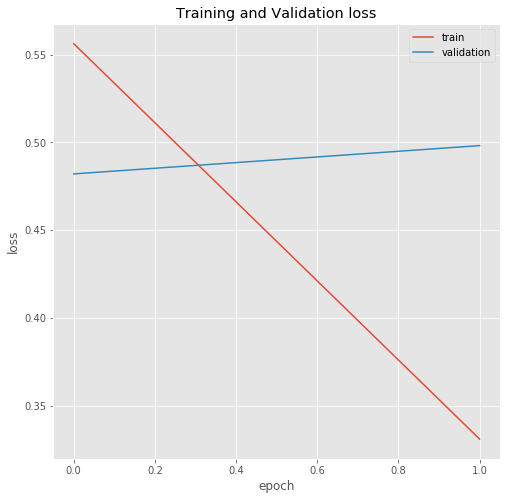

In [16]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
model.evaluate(X_train, y_train, verbose=False)

[0.20170487463474274,
 0.9288570284843445,
 0.9557822942733765,
 0.8743679523468018]

### Testing Model

In [18]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

Instructions for updating:
Please use Model.predict, which supports generators.


,Negative,Positive
Negative,752,122
Positive,205,422


In [19]:
results

,Value
Accuracy,0.782145
Precision,0.775735
FPR,0.139588
Recall,0.673046
F1,0.720751


### Summary of Keras Embedding Layer
- The highest achievable accuracy is 77%.
- F1 score is 0.7.
- Recall and Precision are 65% and 77% respectively.
- Validation loss never goes below ~0.34.
- Best performance is at batch size of 32.
- The base model seems to be better than this in terms of accuracy.

# SimpleRNN+keras embedding layer

In [37]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.2, random_state=42, shuffle=True)

In [38]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test  = tokenizer.texts_to_sequences(sentences_test)

max_length = max([len(s.split()) for s in sentences])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test =pad_sequences(X_test, maxlen=max_length, padding='post')

In [39]:
from keras import layers
from keras.layers import Dense,Dropout,Embedding,SpatialDropout1D

embedding_dim = 50
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.25))
model.add(SimpleRNN(128,return_sequences=True))
model.add(SimpleRNN(64,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           581650    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 50)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100, 128)          22912     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [40]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=32,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)])

keras_embed_RNN_model = model.to_json()
with open('./NN_Models/keras_embed_RNN_model.json', 'w') as json_file:
    json_file.write(keras_embed_RNN_model)

model.save_weights('./NN_Models/keras_embed_RNN_model.h5')

print('saved model!')

Epoch 1/30
169/169 [==============================] - 4s 24ms/step - loss: 0.6312 - accuracy: 0.6445 - val_loss: 0.5393 - val_accuracy: 0.7571
Epoch 2/30
169/169 [==============================] - 4s 24ms/step - loss: 0.4650 - accuracy: 0.7999 - val_loss: 0.5856 - val_accuracy: 0.7354
Epoch 3/30
169/169 [==============================] - 4s 26ms/step - loss: 0.3642 - accuracy: 0.8608 - val_loss: 0.5458 - val_accuracy: 0.7554
Epoch 4/30
169/169 [==============================] - 4s 24ms/step - loss: 0.2893 - accuracy: 0.8984 - val_loss: 0.5933 - val_accuracy: 0.7604
Epoch 5/30
169/169 [==============================] - 4s 24ms/step - loss: 0.2560 - accuracy: 0.9106 - val_loss: 0.6228 - val_accuracy: 0.7537
Epoch 6/30
169/169 [==============================] - 4s 25ms/step - loss: 0.2184 - accuracy: 0.9272 - val_loss: 0.6465 - val_accuracy: 0.7454
Epoch 7/30
169/169 [==============================] - 4s 25ms/step - loss: 0.1798 - accuracy: 0.9387 - val_loss: 0.8115 - val_accuracy: 0.7171

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


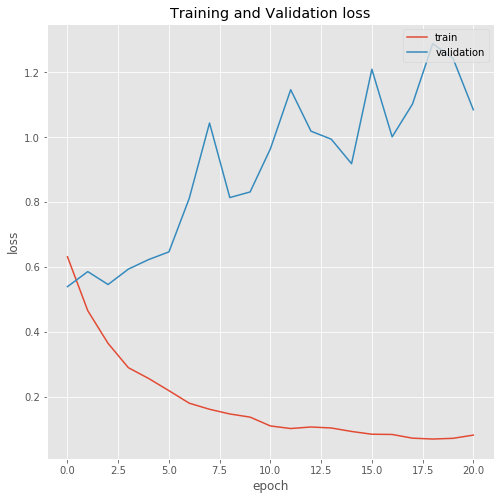

In [41]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [42]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,670,204
Positive,193,434


In [43]:
results

,Value
Accuracy,0.735510
Precision,0.680251
FPR,0.233410
Recall,0.692185
F1,0.686166


# LSTM+keras embedding layer

In [44]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.2, random_state=42, shuffle=True)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test  = tokenizer.texts_to_sequences(sentences_test)

In [45]:
max_length = max([len(s.split()) for s in sentences])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test =pad_sequences(X_test, maxlen=max_length, padding='post')

In [46]:
from keras import layers
from keras.layers import Dense,Dropout,Embedding,LSTM,SpatialDropout1D, Bidirectional

embedding_dim = 64
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 64)           744512    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 128)          98816     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [47]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=64,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

lstm_keras_embed_model = model.to_json()
with open('./NN_Models/lstm_keras_embed_model.json', 'w') as json_file:
    json_file.write(lstm_keras_embed_model)

model.save_weights('./NN_Models/lstm_keras_embed_model.h5')

print('saved model!')

Epoch 1/50
85/85 [==============================] - 7s 81ms/step - loss: 0.5890 - accuracy: 0.6693 - val_loss: 0.4612 - val_accuracy: 0.7903
Epoch 2/50
85/85 [==============================] - 6s 73ms/step - loss: 0.3796 - accuracy: 0.8515 - val_loss: 0.5236 - val_accuracy: 0.7770
Epoch 3/50
85/85 [==============================] - 7s 78ms/step - loss: 0.2903 - accuracy: 0.8924 - val_loss: 0.5663 - val_accuracy: 0.7687
Epoch 4/50
85/85 [==============================] - 6s 73ms/step - loss: 0.2414 - accuracy: 0.9159 - val_loss: 0.5270 - val_accuracy: 0.7504
Epoch 00004: early stopping
saved model!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


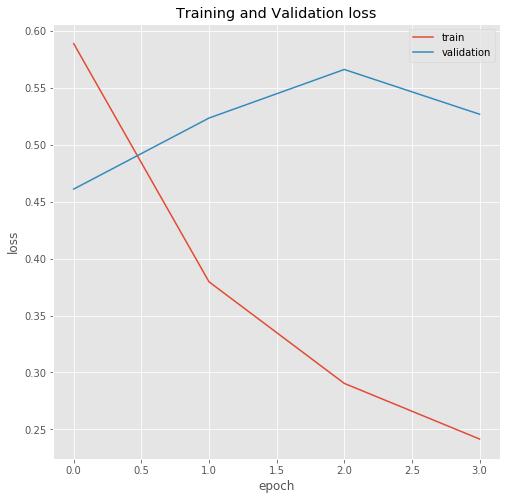

In [50]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [48]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,718,156
Positive,184,443


In [49]:
results

,Value
Accuracy,0.773484
Precision,0.739566
FPR,0.178490
Recall,0.706539
F1,0.722675


# Bidirectional+keras embedding layer

In [51]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1163300   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          234496    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [52]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=32,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

blstm_keras_embed_model = model.to_json()
with open('./NN_Models/blstm_keras_embed_model.json', 'w') as json_file:
    json_file.write(blstm_keras_embed_model)

model.save_weights('./NN_Models/blstm_keras_embed_model.h5')

print('saved model!')

Epoch 1/50
169/169 [==============================] - 19s 113ms/step - loss: 0.5552 - accuracy: 0.7156 - val_loss: 0.4689 - val_accuracy: 0.7770
Epoch 2/50
169/169 [==============================] - 18s 104ms/step - loss: 0.3539 - accuracy: 0.8630 - val_loss: 0.4689 - val_accuracy: 0.7820
Epoch 3/50
169/169 [==============================] - 18s 104ms/step - loss: 0.2663 - accuracy: 0.8950 - val_loss: 0.5286 - val_accuracy: 0.7754
Epoch 4/50
169/169 [==============================] - 18s 105ms/step - loss: 0.2011 - accuracy: 0.9243 - val_loss: 0.6735 - val_accuracy: 0.7671
Epoch 5/50
169/169 [==============================] - 18s 105ms/step - loss: 0.1590 - accuracy: 0.9420 - val_loss: 0.8734 - val_accuracy: 0.7687
Epoch 00005: early stopping
saved model!


In [53]:
predictions = []
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)

def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,719,155
Positive,197,430


In [54]:
results

,Value
Accuracy,0.765490
Precision,0.735043
FPR,0.177346
Recall,0.685805
F1,0.709571
